In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the dataset
df = pd.read_csv("./dataset/synthetic_dataset.csv")

# Data Cleaning

In [34]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values if any
df.fillna(df.mean(), inplace=True)  # Replace missing values with the column mean

Missing values:
 sinhala_exam               0
math_exam                  0
sinhala_incorrect_ratio    0
math_incorrect_ratio       0
weakness                   0
dtype: int64


In [35]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [36]:
# Validate data ranges
# Ensure exam scores are within valid range (0-100)
df = df[(df['sinhala_exam'] >= 0) & (df['sinhala_exam'] <= 100)]
df = df[(df['math_exam'] >= 0) & (df['math_exam'] <= 100)]

# Ensure incorrect ratios are between 0 and 1
df = df[(df['sinhala_incorrect_ratio'] >= 0) & (df['sinhala_incorrect_ratio'] <= 1)]
df = df[(df['math_incorrect_ratio'] >= 0) & (df['math_incorrect_ratio'] <= 1)]

# Validate target column
valid_targets = [0, 1]
df = df[df['weakness'].isin(valid_targets)]

# Print cleaned dataset info
print("Dataset after cleaning:")
print(df.info())
print('\n')
print(df.head())

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sinhala_exam             1000 non-null   int64  
 1   math_exam                1000 non-null   int64  
 2   sinhala_incorrect_ratio  1000 non-null   float64
 3   math_incorrect_ratio     1000 non-null   float64
 4   weakness                 1000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 39.2 KB
None


   sinhala_exam  math_exam  sinhala_incorrect_ratio  math_incorrect_ratio  \
0            78         91                 0.475357              0.365997   
1            60         78                 0.222916              0.049987   
2            50         63                 0.166854              0.071433   
3            42         61                 0.028206              0.360999   
4            69         77                 0.00038

In [12]:
# Shape of the dataset
df.shape

(1000, 5)

In [14]:
# Table of raw dataset
df.head()

,sinhala_exam,math_exam,sinhala_incorrect_ratio,math_incorrect_ratio,weakness
0,78,91,0.475357,0.365997,0
1,60,78,0.222916,0.049987,0
2,50,63,0.166854,0.071433,1
3,42,61,0.028206,0.360999,0
4,69,77,0.000389,0.496106,0


# Data Visualization

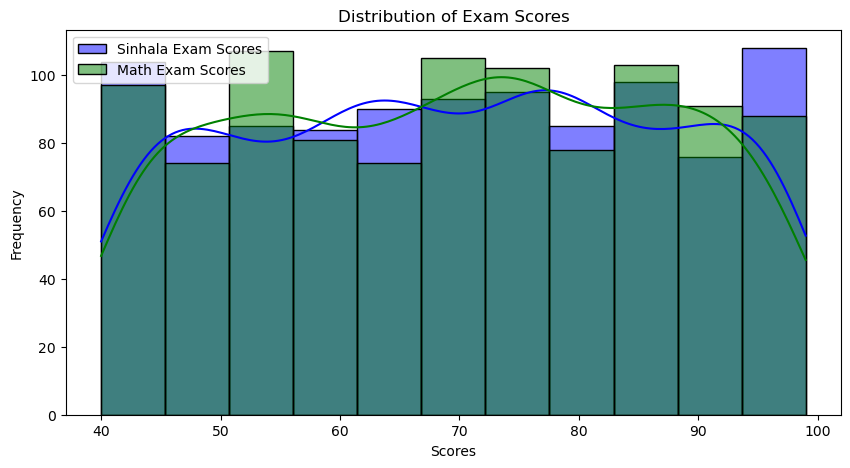

In [39]:
# Distribution of Exam Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['sinhala_exam'], kde=True, color='blue', label='Sinhala Exam Scores')
sns.histplot(df['math_exam'], kde=True, color='green', label='Math Exam Scores')
plt.title("Distribution of Exam Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()

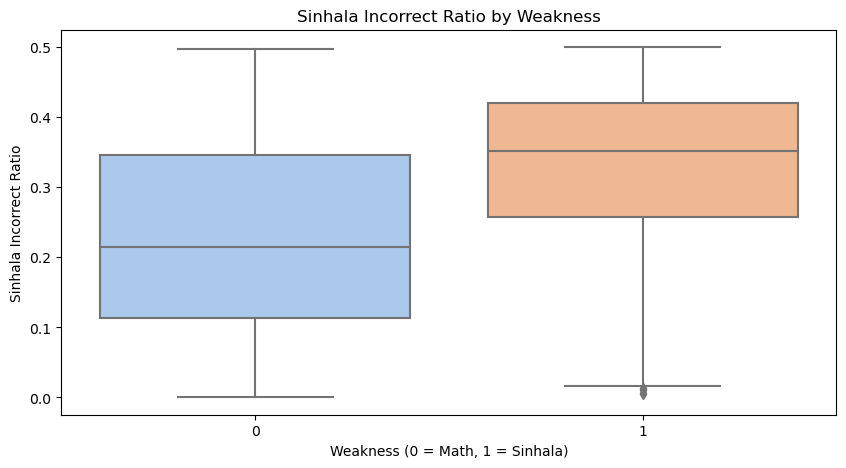

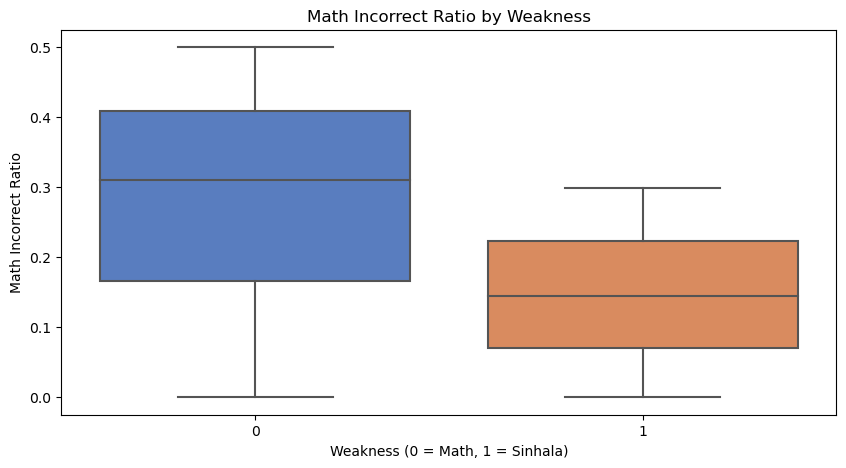

In [40]:
# Incorrect Ratios by Weakness
plt.figure(figsize=(10, 5))
sns.boxplot(x='weakness', y='sinhala_incorrect_ratio', data=df, palette='pastel')
plt.title("Sinhala Incorrect Ratio by Weakness")
plt.xlabel("Weakness (0 = Math, 1 = Sinhala)")
plt.ylabel("Sinhala Incorrect Ratio")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weakness', y='math_incorrect_ratio', data=df, palette='muted')
plt.title("Math Incorrect Ratio by Weakness")
plt.xlabel("Weakness (0 = Math, 1 = Sinhala)")
plt.ylabel("Math Incorrect Ratio")
plt.show()

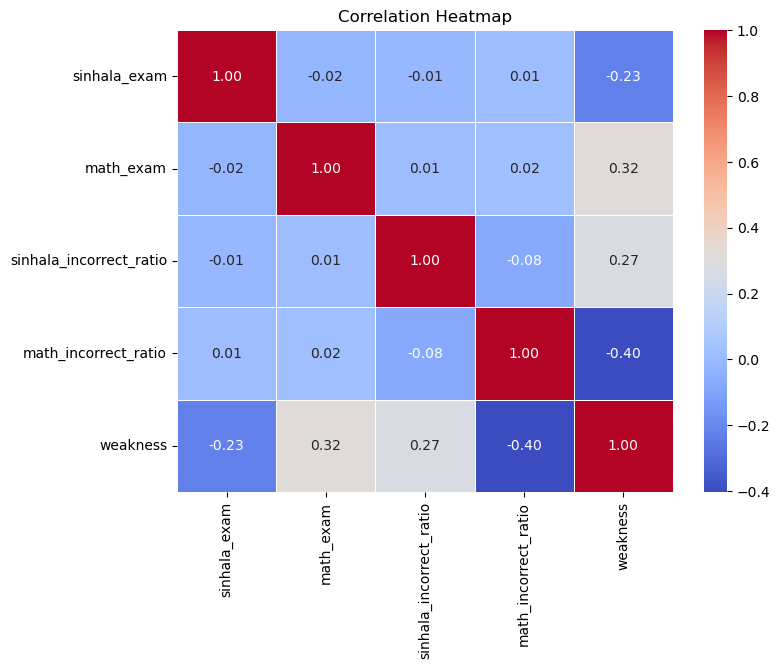

In [41]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

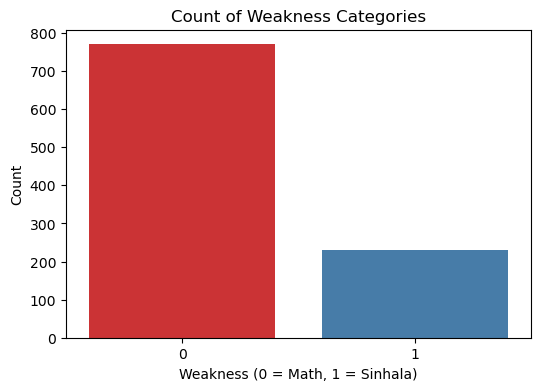

In [45]:
# Count of Weakness Categories
plt.figure(figsize=(6, 4))
sns.countplot(x='weakness', data=df, palette='Set1')
plt.title("Count of Weakness Categories")
plt.xlabel("Weakness (0 = Math, 1 = Sinhala)")
plt.ylabel("Count")
plt.show()

# Training

In [3]:
# Split into features and target
X = df.drop(columns=["weakness"])
y = df["weakness"]

In [16]:
# Table of features dataset
X.head()

,sinhala_exam,math_exam,sinhala_incorrect_ratio,math_incorrect_ratio
0,78,91,0.475357,0.365997
1,60,78,0.222916,0.049987
2,50,63,0.166854,0.071433
3,42,61,0.028206,0.360999
4,69,77,0.000389,0.496106


In [17]:
# Table of target dataset
y.head()

0    0
1    0
2    1
3    0
4    0
Name: weakness, dtype: int64

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Data shape after test and training split 
print('Shape of X_train data -> ' + str(X_train.shape))
print('Shape of X_test data -> ' + str(X_test.shape))
print('\nShape of y_train data -> ' + str(y_train.shape))
print('Shape of y_test data -> ' + str(y_test.shape))

Shape of X_train data -> (800, 4)
Shape of X_test data -> (200, 4)

Shape of y_train data -> (800,)
Shape of y_test data -> (200,)


In [19]:
# Table of features dataset before normalizing
X_train.head()

,sinhala_exam,math_exam,sinhala_incorrect_ratio,math_incorrect_ratio
29,74,76,0.485856,0.424457
535,93,44,0.368590,0.384300
695,67,77,0.489891,0.328067
557,57,68,0.052832,0.320413
836,41,41,0.355055,0.333427


In [22]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Table of features dataset after normalizing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print(X_train_scaled_df.head())

   sinhala_exam  math_exam  sinhala_incorrect_ratio  math_incorrect_ratio
0      0.255349   0.381706                 1.622235              1.173461
1      1.347751  -1.486683                 0.802855              0.898222
2     -0.147115   0.440093                 1.650431              0.512798
3     -0.722064  -0.085391                -1.403461              0.460338
4     -1.641981  -1.661844                 0.708280              0.549537


In [6]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Evaluation

In [7]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [8]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       152
           1       0.70      0.58      0.64        48

    accuracy                           0.84       200
   macro avg       0.79      0.75      0.77       200
weighted avg       0.83      0.84      0.83       200



# Save Model

In [31]:
# Save the model and scaler
joblib.dump(model, "weakness_predictor_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']